In [1]:
# img_directory = '/home/ec2-user/autoencoder-vaegan/colbert'
img_directory = '/Users/rwilliams/Desktop/celeba/training'
batch_size = 64
training_set_size = 640
img_size = 64

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
from utils import imshow, resize_crop, load_img
%matplotlib inline

In [3]:
# load training data
training = np.array([resize_crop(load_img(i+1, img_directory), (img_size, img_size)) for i in range(training_set_size)])

/Users/rwilliams/anaconda/envs/keras/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


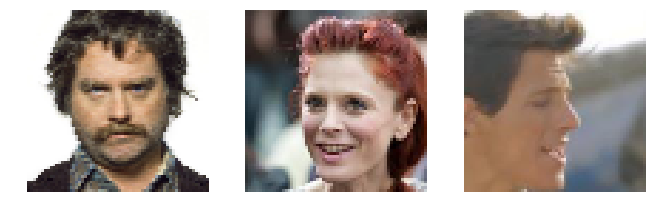

In [4]:
imshow([training[i] for i in range(0,3)])

# Create model and load weights

In [5]:
import tensorflow as tf

from autoencoder import Autoencoder
vae = Autoencoder(img_shape=(img_size, img_size, 3), batch_size=batch_size)

X = tf.placeholder(tf.float32, [None, img_size, img_size, 3])
encoder = vae.encoder(X)
decoder = vae.decoder(encoder)

latent_loss = vae.latent_loss()
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=X, logits=vae.logits)
reconstruction_loss = tf.reduce_sum(xentropy)
loss = reconstruction_loss + latent_loss

optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()


In [25]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [26]:
import math
epochs = 10
batches = int(float(training_set_size) / batch_size) 

for epoch in range(epochs):
    loss_out = np.zeros(batches)
    for batch in range(batches):
        feed = training[batch*batch_size:(batch+1)*batch_size]
        _, loss_out[batch] = sess.run([training_op, loss], feed_dict={X: feed})

    print('loss: %s' % np.mean(loss_out))

loss: 542255.65
loss: 535996.56875
loss: 529930.325


KeyboardInterrupt: 

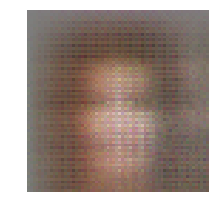

In [27]:
y = sess.run(decoder, feed_dict={X: [training[1]]})
y.shape
imshow([y[0]])